In [37]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# load data
df = pd.read_csv("9_Exercise.csv")

# preprocessing
df.drop("CustomerId", axis="columns", inplace = True)
df.drop("Surname", axis="columns", inplace = True)
df.drop("RowNumber", axis="columns", inplace = True)
df = pd.get_dummies(data=df, columns=['Geography','Gender'])

cols_to_scale = ['Balance','CreditScore','Age', "NumOfProducts", "Tenure", "EstimatedSalary"]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2389,0.610,0.229730,0.1,0.327749,0.333333,1,0,0.443975,0,0,0,1,1,0
6614,0.678,0.216216,0.1,0.658882,0.000000,1,0,0.777495,0,1,0,0,0,1
5365,0.378,0.283784,0.2,0.000000,0.333333,1,1,0.240915,0,0,0,1,0,1
541,0.544,0.108108,0.9,0.000000,0.333333,1,1,0.766203,0,1,0,0,0,1
8897,0.506,0.445946,0.8,0.744627,0.000000,1,0,0.468685,1,1,0,0,0,1
6132,0.674,0.216216,0.9,0.500101,0.000000,1,0,0.994686,0,1,0,0,1,0
3773,0.798,0.229730,0.3,0.000000,0.666667,1,1,0.663255,0,1,0,0,1,0
747,0.200,0.378378,0.5,0.707936,0.000000,1,0,0.271103,0,0,0,1,1,0
3022,0.596,0.121622,0.7,0.000000,0.333333,1,1,0.815322,0,0,0,1,1,0
6277,0.508,0.216216,0.3,0.000000,0.333333,1,0,0.192899,0,0,0,1,1,0


In [38]:
# create train and test sets
X = df.drop("Exited", axis="columns")
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape

(8000, 13)

In [39]:
# build model


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13, ), activation="relu"), # Input Layer / hidden layer
    keras.layers.Dense(1, activation="sigmoid") # Output layer
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [40]:
# train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7560
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8012
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8052
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8081
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8111
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8136
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8134
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4165 - accura

In [41]:
# evaluate model
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 904us/step - loss: 0.3499 - accuracy: 0.8515


[0.3498769700527191, 0.8514999747276306]

In [42]:
# predict test sets
y_pred = model.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# print prediction vs actual side by side
np.c_[y_pred[:20], y_test[:20]]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [46]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Actual')

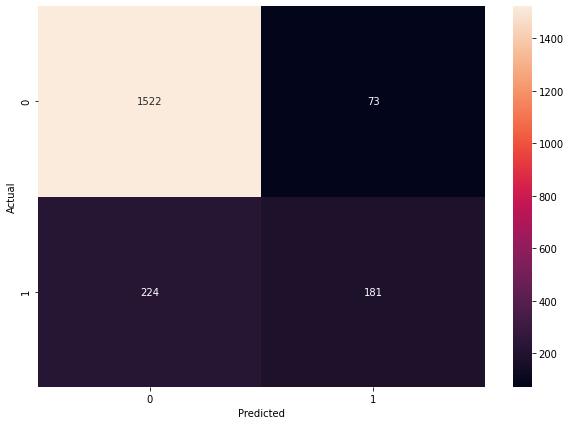

In [47]:
# plot it
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")